In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset
Since data is in form of excel file we have to use pandas read_excel to load the data
After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
Check whether any null values are there or not. if it is present then following can be done,
Imputing data using Imputation method in sklearn
Filling NaN values with mean, median and mode using fillna() method
Describe data --> which can give statistical analysis

In [2]:
train_data=pd.read_excel(r"C:\Users\AwesomeAkbar\Desktop\data science contents\udemy projects\Data_Train.xlsx")
pd.set_option("display.max_columns",None)

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.shape

(10683, 11)

In [5]:
train_data.info()   ### as we can see 2 values are missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
## so we can drop the missing values
train_data.dropna(inplace = True)

In [8]:
train_data.shape

(10682, 11)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA


From description we can see that Date_of_Journey, Dept_time, Arri_ time  is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

.dt.day method will extract only day of that date
.dt.month method will extract only month of that date

In [10]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [11]:
### extracting day and month from the date of journey column
train_data["journey_day"]=pd.to_datetime(train_data["Date_of_Journey"]).dt.day
train_data["journey_month"]=pd.to_datetime(train_data["Date_of_Journey"]).dt.month




In [12]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1


In [13]:
train_data.shape

(10682, 13)

In [14]:
###similarly we can extract hours and minutes from dept time
train_data["dept_hours"]=pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["dept_minutes"]=pd.to_datetime(train_data["Dep_Time"]).dt.minute

In [15]:
train_data.shape

(10682, 15)

In [16]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dept_hours,dept_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50


In [17]:
## similarly  from arrival time we can extract hours and minutes
train_data["arrival_hours"]=pd.to_datetime(train_data["Arrival_Time"]).dt.hour
train_data["arrival_minutes"]=pd.to_datetime(train_data["Arrival_Time"]).dt.minute


In [18]:
train_data.shape

(10682, 17)

In [19]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dept_hours,dept_minutes,arrival_hours,arrival_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


In [20]:
## now we can drop date of journey , dept time and arrival time as we have extracted numerical  values from it
train_data.drop(["Date_of_Journey","Dep_Time","Arrival_Time"],axis=1,inplace=True)

In [21]:
train_data.shape

(10682, 14)

In [22]:
train_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dept_hours,dept_minutes,arrival_hours,arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25


In [23]:
# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [24]:
train_data["duration_hours"]=duration_hours
train_data["duration_mins"]=duration_mins 



In [25]:
train_data.shape

(10682, 16)

In [26]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dept_hours,dept_minutes,arrival_hours,arrival_minutes,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25


In [27]:
### now we can drop duration from the column
train_data.drop(columns="Duration",inplace=True)   ### or we can aso write train_data.drop("Duration",axis=1,inplace=True) 

In [28]:
train_data.shape

(10682, 15)

# now its time to deal with categorical variable



One can find many ways to handle categorical data. Some of them categorical data are,

Nominal data --> data are not in any order --> OneHotEncoder is used in this case
Ordinal data --> data are in order --> LabelEncoder is used in this case

# airline vs price analysis

<AxesSubplot:xlabel='Airline', ylabel='Price'>

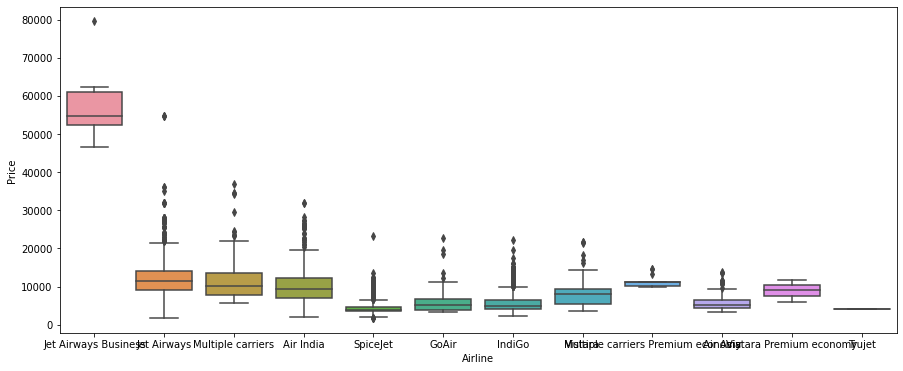

In [29]:
## plotting a box plot between airline and price
plt.figure(figsize=(15,6))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Source', ylabel='Price'>

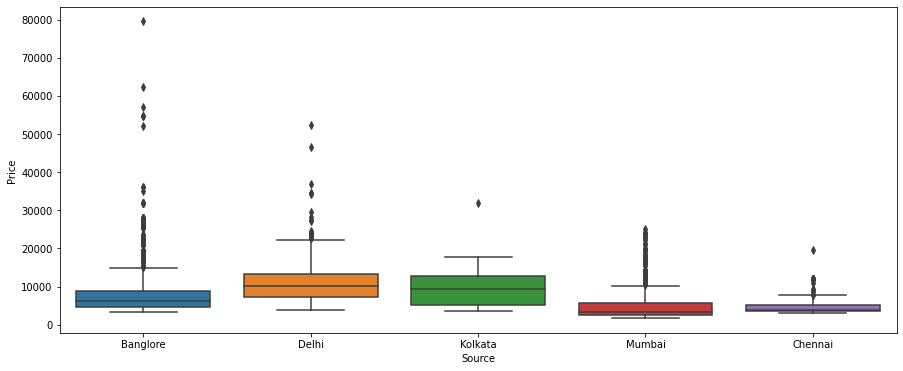

In [30]:
## box plot between source and price
plt.figure(figsize=(15,6))
sns.boxplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Destination', ylabel='Price'>

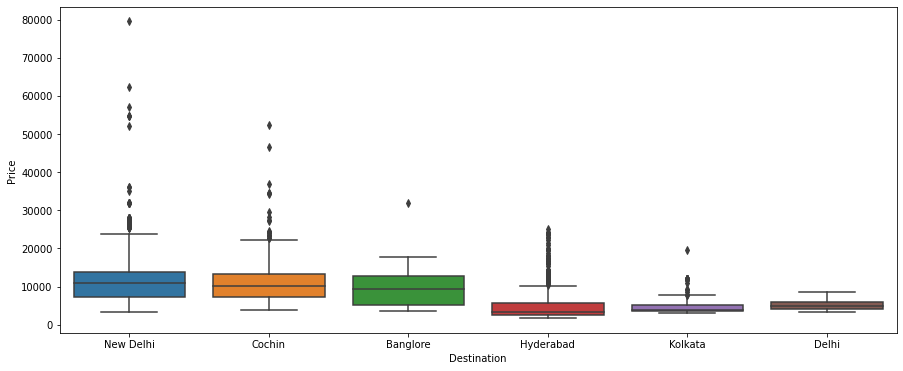

In [31]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False))

In [32]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [33]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
airline=pd.get_dummies(train_data["Airline"],   drop_first=True)
airline.shape

(10682, 11)

In [34]:
airline.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


In [35]:
## similarly we can also handle with source and destination
source=pd.get_dummies(train_data["Source"], drop_first=True)
destination=pd.get_dummies(train_data["Destination"],drop_first=True)

In [36]:
source.head(2)

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0


In [37]:
destination.head(2)

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0


In [38]:
## now we can add this new columns into train_data
train_data=pd.concat([train_data,airline,source,destination],axis=1)


In [39]:
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dept_hours,dept_minutes,arrival_hours,arrival_minutes,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [40]:
train_data.drop(["Airline","Source","Destination"], axis =1, inplace =True)

In [41]:
train_data.shape

(10682, 32)

In [42]:
train_data.head(2)

,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dept_hours,dept_minutes,arrival_hours,arrival_minutes,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [43]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [44]:
## since total stops is ordinal categorical value so we should convert it by label encoder
# creating a dctionary first
## by mapping function we can assign the value
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4 }    
  

In [45]:
train_data["Total_Stops"]=train_data["Total_Stops"].map(dict)   

In [46]:
train_data.head(2)

,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dept_hours,dept_minutes,arrival_hours,arrival_minutes,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [47]:
train_data.shape

(10682, 32)

In [48]:
# Additional_Info contains almost 80% no_info , so we can drop that column
# Route and Total_Stops are related to each other,  so we can drop route also
train_data.drop(["Route","Additional_Info"],axis =1,inplace= True)


In [49]:
train_data.shape

(10682, 30)

In [50]:
train_data.head(2)

,Total_Stops,Price,journey_day,journey_month,dept_hours,dept_minutes,arrival_hours,arrival_minutes,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.                                   
Following are some of the feature selection methods,

1) heatmap
2)feature_importance
3)selectKbest


In [51]:
train_data.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dept_hours',
       'dept_minutes', 'arrival_hours', 'arrival_minutes', 'duration_hours',
       'duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [52]:
train_data.shape

(10682, 30)

## dividing the independent and dependent variables

In [53]:
train_data.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dept_hours',
       'dept_minutes', 'arrival_hours', 'arrival_minutes', 'duration_hours',
       'duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [54]:
X=train_data.drop("Price",axis=1)

In [55]:
X.shape

(10682, 29)

In [56]:
X.head(2)

,Total_Stops,journey_day,journey_month,dept_hours,dept_minutes,arrival_hours,arrival_minutes,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [57]:
y=train_data.iloc[:,1]

In [58]:
y.shape

(10682,)

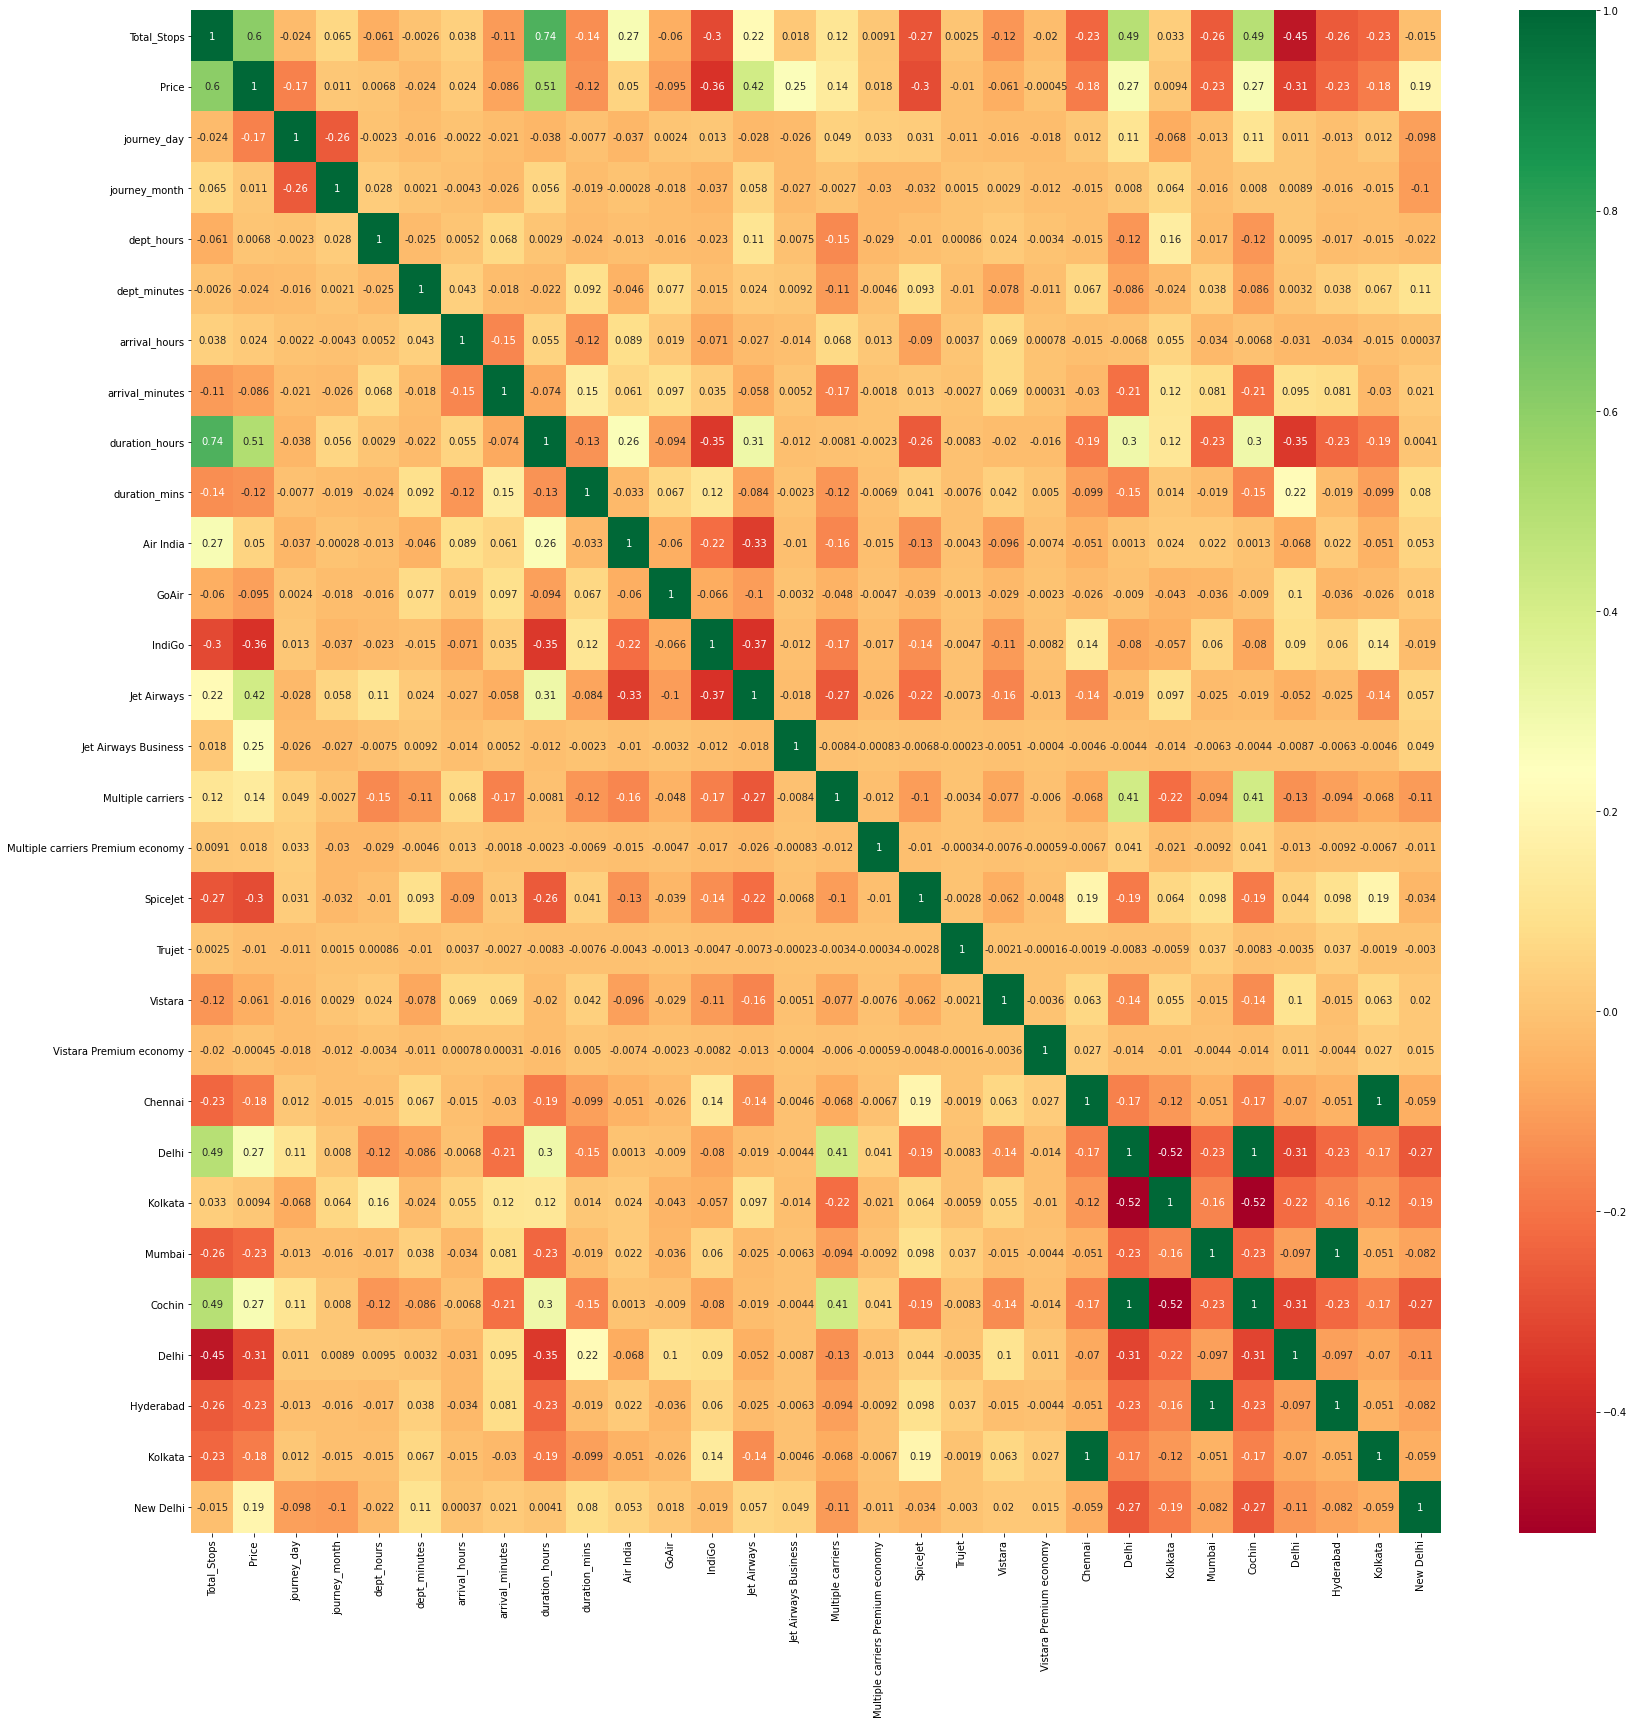

In [59]:
## plotting a heatmap to find the correlation between dependent and independent variables
plt.figure(figsize=(28,28))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [61]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)


ExtraTreesRegressor()

In [62]:
print(selection.feature_importances_)

[2.31677975e-01 1.10189526e-01 8.41523058e-02 2.54465859e-02
 2.21678604e-02 2.82923475e-02 2.11727658e-02 1.18110040e-01
 1.82778559e-02 1.02862938e-02 1.79216688e-03 1.82046862e-02
 1.37239295e-01 6.72699231e-02 1.87442844e-02 9.44016945e-04
 3.62620148e-03 9.91543200e-05 5.17707554e-03 1.44167468e-04
 5.84856762e-04 1.32976352e-02 4.47903043e-03 7.04131726e-03
 8.57106618e-03 1.42151585e-02 5.52612547e-03 4.87932988e-04
 2.27823503e-02]


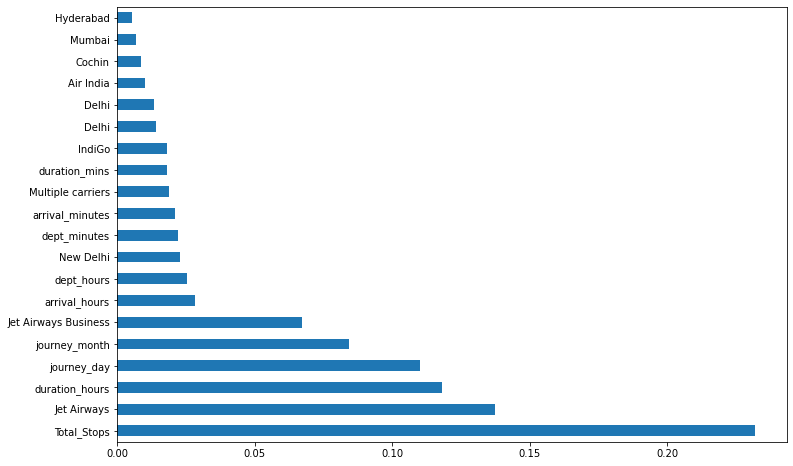

In [63]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model using Random Forest
Split dataset into train and test set in order to prediction w.r.t X_test
If needed do scaling of data
Scaling is not done in Random forest
Import model
Fit the data
Predict w.r.t X_test
In regression check RSME Score
Plot graph

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [71]:
print(X_train.shape ,y_train.shape ,X_test.shape  ,y_test.shape) 


(8545, 29) (8545,) (2137, 29) (2137,)


In [72]:
from sklearn.ensemble import RandomForestRegressor         ###fitting the model random forest regressor
reg= RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [74]:
y_pred=reg.predict(X_test)

In [75]:
reg.score(X_train,y_train)

0.9520738665320425

In [84]:
reg.score(X_test,y_test)

0.790525333529021

c:\users\awesomeakbar\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


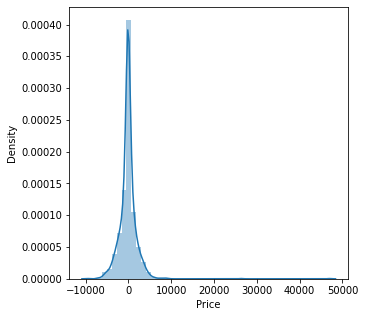

In [85]:
plt.figure(figsize=(5,5))
sns.distplot(y_test-y_pred)
plt.show()

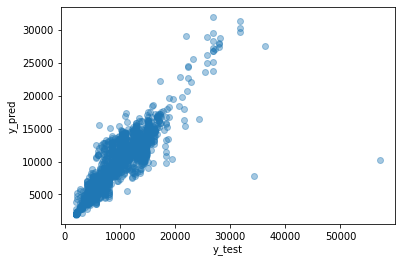

In [98]:
plt.scatter(y_test,y_pred,alpha=0.4)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [99]:
from sklearn import metrics

In [100]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1196.987762565659
MSE: 4516704.556932253
RMSE: 2125.2539982158023


In [101]:
metrics.r2_score(y_test, y_pred)

0.790525333529021

# Hyperparameter Tuning
.Choose following method for hyperparameter tuning
1)RandomizedSearchCV --> Fast
2)GridSearchCV
.Assign hyperparameters in form of dictionery
.Fit the model
.Check best paramters and best score

In [102]:
from sklearn.model_selection import RandomizedSearchCV

In [103]:
####RANDOMIZED SEARCH CV

# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [104]:
# Create the random grid

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [105]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [106]:
### initialise your estimator
reg=RandomForestRegressor()

In [107]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [108]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_split=100, n_estimators=760; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=100, n_estimators=760; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=100, n_estimators=760; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=100, n_estimators=760; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=100, n_estimators=760; total time=   2.7s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=980; total time=   7.1s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=980; total time=   7.3s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=980; total time=   7.3s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=980; total time=   7.1s
[CV] END max_depth=21, max_fea

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [109]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 21}

In [110]:
prediction = rf_random.predict(X_test)

In [111]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1167.0591910230023
MSE: 4124545.217862491
RMSE: 2030.8976384501734


In [113]:
metrics.r2_score(y_test,prediction)

0.8087128075423562